# PART A: ARCH_GARCH Model

In [1]:
!pip install yfinance


In [2]:
!pip install arch


  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/37/08/acd7fbc1e15b4701b5be3acd6fd575865a274885ea6bc72ec7af909cc7e5/arch-7.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.9 kB ? eta -:--:--
   --- ----------------------------------- 81.9/924.9 kB 919.0 kB/s eta 0:00:01
   --------------------- ------------------ 501.8/924.9 kB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 901.1/924.9 kB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 924.9/924.9 kB 3.9 MB/s eta 0:00:00


In [3]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [5]:
# Get the data for AMAZON
ticker = "AMZN"

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1680.83
Distribution:                  Normal   AIC:                           3367.67
Method:            Maximum Likelihood   BIC:                           3381.54
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        16:16:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0369  7.986e-02      0.461      0.644 [ -0.120,  0.19

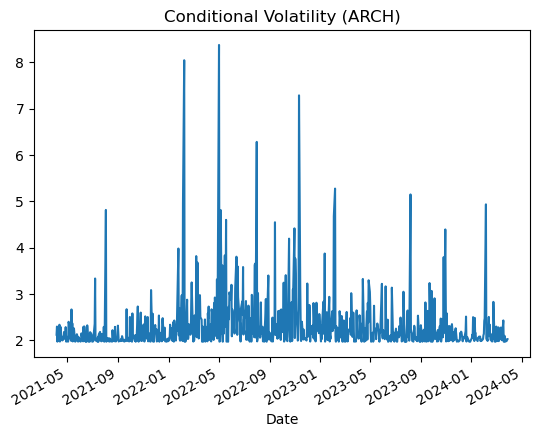

In [6]:
# Create 'Returns' column
data['Returns'] = 100 * data['Adj Close'].pct_change().dropna()

# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'].dropna(), vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1658.75
Distribution:                  Normal   AIC:                           3325.51
Method:            Maximum Likelihood   BIC:                           3344.00
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        16:16:41   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1113  7.240e-02      1.537      0.124 [-3.06

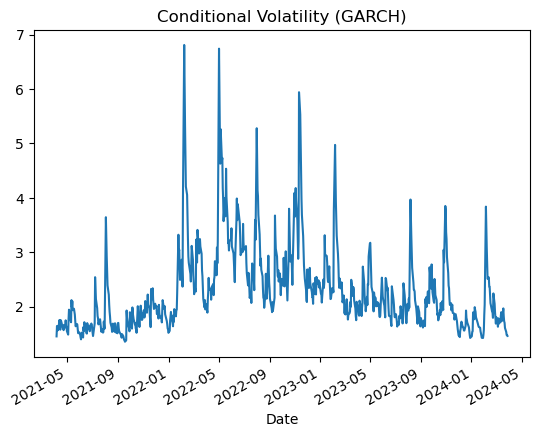

In [7]:
# Drop NaN values from 'Returns'
returns = data['Returns'].dropna()

# Fit a GARCH model
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [8]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=10)

Iteration:     10,   Func. Count:     62,   Neg. LLF: 1658.7534267874767
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1658.7534257236698
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


In [9]:
forecasts = res.forecast()

In [10]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100,0.404155
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500,0.469621
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000,-0.784599
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600,0.858104
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600,0.305846


In [12]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.111253
                 h.1
Date                
2024-03-28  2.000286
                 h.1
Date                
2024-03-28  2.000286


In [13]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04     h.05      h.06  \
Date                                                                    
2024-03-28  2.000286  2.263874  2.514326  2.752298  2.97841  3.193254   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-03-28  3.397391  3.591355  3.775653  3.950767  ...  7.200975  7.205389   

                h.83      h.84      h.85      h.86      h.87     h.88  \
Date                                                                    
2024-03-28  7.209583  7.213569  7.217355  7.220953  7.224372  7.22762   

                h.89      h.90  
Date                            
2024-03-28  7.230707  7.233639  

[1 rows x 90 columns]


In [14]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,2.000286,2.263874,2.514326,2.752298,2.97841,3.193254,3.397391,3.591355,3.775653,3.950767,...,7.200975,7.205389,7.209583,7.213569,7.217355,7.220953,7.224372,7.22762,7.230707,7.233639


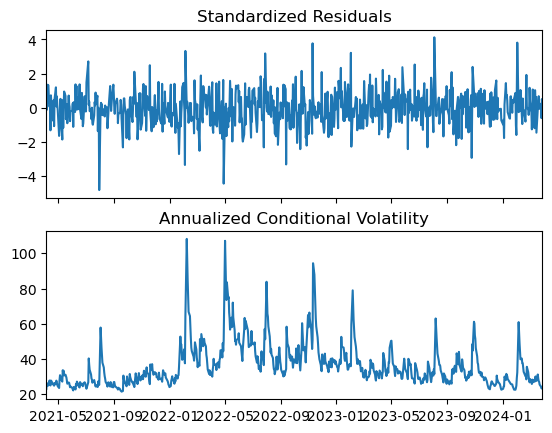

In [15]:
fig = res.plot(annualize="D")